# Transmit (TX) Modulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rfproto import measurements, plot, sig_gen

## Chirp

A **chirp** is a signal where the frequency increases (_up-chirp_) or decreases (_down-chirp_) with time, (also known as a frequency sweep).

### Linear Frequency Modulated (LFM) Chirp

In LFM chirp, the instantaneous frequency, $f(t)$ (in Hz), varies linearly with time:
$$f(t) = ct + f_{0}$$

where $f_{0}$ is the starting frequency (Hz), and $c$ is the constant chirp rate given an end frequency $f_{1}$ (Hz) and the sweep time between frequencies $T$:
$$c = \frac{f_{1} - f_{0}}{T}$$

Since [frequency is the derivative of phase](https://en.wikipedia.org/wiki/Instantaneous_phase_and_frequency) (e.g. $\omega(t) = \frac{d\phi(t)}{dt}$), and frequency is linearly changing (increasing or decreasing), it is expected that phase changes _quadratic_ over time, as shown by:
$$\phi(t) = \phi_{0} + 2\pi \int^{t}_{0}f(\tau)d\tau \rightarrow \phi_{0} + 2\pi \int^{t}_{0}(c\tau + f_{0})d\tau $$
$$\therefore \phi(t) = \phi_{0} + 2\pi \left( \frac{c}{2}t^{2} + f_{0}t \right)$$

The corresponding time-domain output is simply the $\sin()$ of this phase function, or $e^{j\phi(t)}$ for complex output.

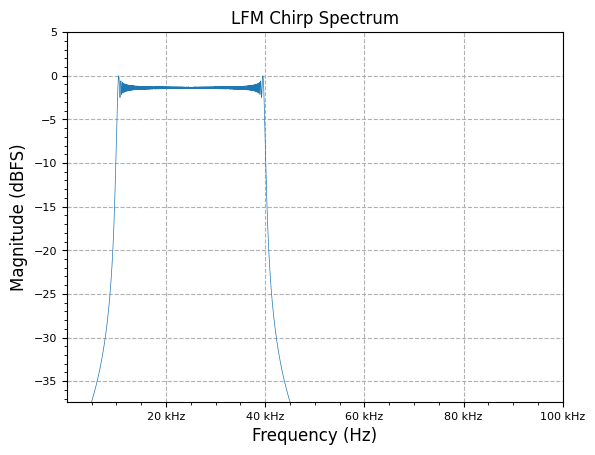

In [2]:
f_start = 10e3
f_end = 40e3
fs = 100e3
num_samples = 10000

lfm_chirp_sig = sig_gen.cmplx_dt_lfm_chirp(1, f_start, f_end, fs, num_samples)
freq, y_PSD = measurements.PSD(lfm_chirp_sig, fs, real=False, norm=True)
plot.freq_sig(freq, y_PSD, "LFM Chirp Spectrum", scale_noise=True)
plt.show()

## References

* [Chirp - Wikipedia](https://en.wikipedia.org/wiki/Chirp)
* [Coherent Processing of Up/Down Linear Frequency Modulated Chirps - Sandia National Lab](https://www.osti.gov/servlets/purl/1716574)